### Deep Neural Networks

## CaliFornia housing Prices

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import optimizers

#### REGRESSION MLP

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
housing=fetch_california_housing()

In [21]:
X_train_full,X_test,y_train_full,y_test=train_test_split(housing['data'],housing.target)

In [22]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [24]:
model=keras.Sequential([
     keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(20),
    keras.layers.Dense(1)
])
sgd=optimizers.SGD(learning_rate=0.015)
model.compile(loss='mean_squared_error',optimizers=sgd) 

In [25]:
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=10,batch_size=64)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 59us/sample - loss: 1.6534 - val_loss: 0.5667
Epoch 2/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5619 - val_loss: 0.4548
Epoch 3/10
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4435 - val_loss: 0.4390
Epoch 4/10
11610/11610 [==============================] - 0s 24us/sample - loss: 0.3952 - val_loss: 0.4402
Epoch 5/10
11610/11610 [==============================] - 0s 17us/sample - loss: 0.3864 - val_loss: 0.4078
Epoch 6/10
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3662 - val_loss: 0.4224
Epoch 7/10
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3600 - val_loss: 0.3897
Epoch 8/10
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3556 - val_loss: 0.3891
Epoch 9/10
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3507 - val_l

In [26]:
model.evaluate(X_test,y_test,verbose=2)

5160/1 - 0s - loss: 0.3307


0.46972967529481696

In [27]:
model.predict(X_test[0:3,])

array([[5.0181804],
       [1.4991875],
       [2.3961825]], dtype=float32)

In [28]:
y_test[0:3]

array([5.00001, 1.067  , 2.314  ])

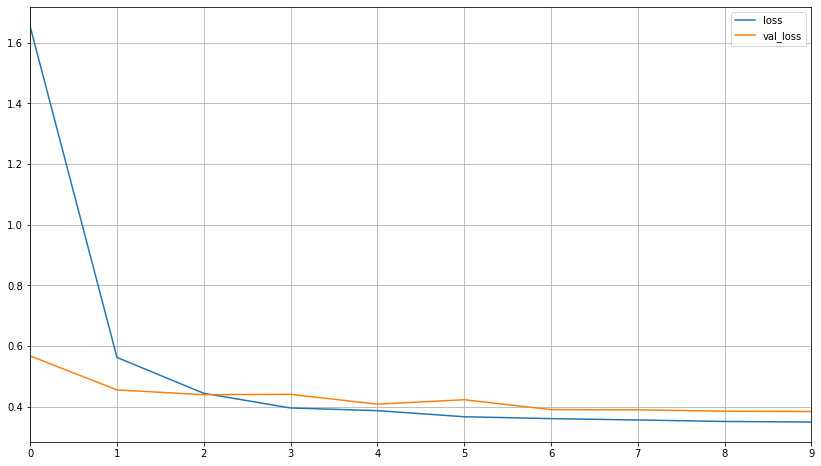

In [29]:
pd.DataFrame(history.history).plot(figsize=(14,8))
plt.grid(True)

#### Non-sequential NN Wide and Deep Learning

In [30]:
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
input_=keras.layers.Input(shape=X_train.shape[1:]) #or shape=[featuresnumbers]
hidden1=keras.layers.Dense(30,activation='relu')(input_)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_],outputs=[output])

In [32]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))



Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 60us/sample - loss: 1.2759 - val_loss: 0.7136
Epoch 2/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.6751 - val_loss: 0.6532
Epoch 3/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5979 - val_loss: 0.6114
Epoch 4/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5693 - val_loss: 0.5989
Epoch 5/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5448 - val_loss: 0.5701
Epoch 6/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5273 - val_loss: 0.5637
Epoch 7/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.5112 - val_loss: 0.5413
Epoch 8/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4976 - val_loss: 0.5328
Epoch 9/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4858 - val_l

In [33]:
mse_test = model.evaluate(X_test, y_test,verbose=2)

5160/1 - 0s - loss: 0.3322


what if u want to use subset of fefeatures  for wide and a subset of features for deep?

In [34]:
input_a=keras.layers.Input(shape=[4],name='wide')
input_b=keras.layers.Input(shape=[6],name='deep')
hidden1=keras.layers.Dense(30,activation='relu')(input_b)
hidden2=keras.layers.Dense(20,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([input_a,hidden2]) 
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_a,input_b],outputs=[output])

In [35]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep (InputLayer)               [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           210         deep[0][0]                       
__________________________________________________________________________________________________
wide (InputLayer)               [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 20)           620         dense_9[0][0]                    
____________________________________________________________________________________________

In [36]:
model.compile(loss='mse',optimizer=optimizers.SGD(learning_rate=0.01))

In [37]:
X_train_A,X_train_B =X_train[:,:4],X_train[:,2:]
X_valid_A,X_valid_B =X_valid[:,:4],X_valid[:,2:]
X_test_A, X_test_B = X_test[:, :4],X_test[:,2:]

In [38]:
history = model.fit((X_train_A, X_train_B), y_train, 
                    epochs=10,
                    validation_data=((X_valid_A, X_valid_B), y_valid))


Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 75us/sample - loss: 0.7606 - val_loss: 0.5238
Epoch 2/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4824 - val_loss: 0.4949
Epoch 3/10
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4366 - val_loss: 0.4632
Epoch 4/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4131 - val_loss: 0.4345
Epoch 5/10
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4007 - val_loss: 0.4299
Epoch 6/10
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3911 - val_loss: 0.4192
Epoch 7/10
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3827 - val_loss: 0.4098
Epoch 8/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3791 - val_loss: 0.4045
Epoch 9/10
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3703 - val_l

In [39]:
model.evaluate((X_test_A,X_test_B),y_test,verbose=2)

5160/1 - 0s - loss: 0.2640


0.39147980439570523

### With Auxilary Output (Multipletasks outputs) Regression+classification

In [40]:
input_a=keras.layers.Input(shape=[4],name='wide')
input_b=keras.layers.Input(shape=[6],name='deep')
hidden1=keras.layers.Dense(30,activation='relu')(input_b)
hidden2=keras.layers.Dense(20,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([input_a,hidden2]) 
output=keras.layers.Dense(1,name='main_output')(concat)
aux_out=keras.layers.Dense(1,name='Auxulary_output')(hidden2)
model=keras.Model(inputs=[input_a,input_b],outputs=[output,aux_out])

In [41]:
model.compile(loss=['mse','mse'],loss_weights=[0.9,0.1],optimizer='sgd')
#we should pass list of losses
#weight for main output > auxilary output since auxilary is used for regularization

In [42]:
#2 y_trains
history = model.fit((X_train_A, X_train_B), (y_train,y_train), 
                    epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid,y_valid)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 101us/sample - loss: 0.9930 - main_output_loss: 0.8745 - Auxulary_output_loss: 2.0574 - val_loss: 0.6444 - val_main_output_loss: 0.5736 - val_Auxulary_output_loss: 1.2825
Epoch 2/10
11610/11610 [==============================] - 1s 46us/sample - loss: 0.6099 - main_output_loss: 0.5552 - Auxulary_output_loss: 1.1015 - val_loss: 0.5759 - val_main_output_loss: 0.5238 - val_Auxulary_output_loss: 1.0446
Epoch 3/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5088 - main_output_loss: 0.4646 - Auxulary_output_loss: 0.9090 - val_loss: 0.5108 - val_main_output_loss: 0.4731 - val_Auxulary_output_loss: 0.8506
Epoch 4/10
11610/11610 [==============================] - 1s 61us/sample - loss: 0.4646 - main_output_loss: 0.4293 - Auxulary_output_loss: 0.7814 - val_loss: 0.4879 - val_main_output_loss: 0.4582 - val_Auxulary_output_loss: 0.7556
Epoch 5/10
11610/11610 [==

In [43]:
model.evaluate(
[X_test_A, X_test_B], [y_test, y_test],verbose=2)

5160/1 - 0s - loss: 0.2875 - main_output_loss: 0.3975 - Auxulary_output_loss: 0.5769


[0.4166077457195105, 0.39746565, 0.57693315]

In [44]:
#predicting through main output and auxilary output
main,aux=model.predict([X_test_A[:3],X_test_B[:3]])

In [45]:
main

array([[4.4896727],
       [1.8644842],
       [2.6530297]], dtype=float32)

In [46]:
aux

array([[3.797661 ],
       [2.2372751],
       [2.943886 ]], dtype=float32)

In [47]:
#saving Model
model.save("Vipra_keras_model.h5")

In [48]:
#loading model
model_l=keras.models.load_model('Vipra_keras_model.h5')

#### Callbacks, Rolling and early stopping

In [49]:

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")

In [51]:

history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])
model.save("my_keras_model.h5")

Train on 11610 samples
Epoch 1/10
11610/11610 [==============================] - 1s 50us/sample - loss: 1.8840
Epoch 2/10
11610/11610 [==============================] - 0s 34us/sample - loss: 0.6668
Epoch 3/10
11610/11610 [==============================] - 0s 33us/sample - loss: 0.6005
Epoch 4/10
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5637
Epoch 5/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5342
Epoch 6/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5141
Epoch 7/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4953
Epoch 8/10
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4806
Epoch 9/10
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4687
Epoch 10/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4600


In [52]:
model = keras.models.load_model("my_keras_model.h5") 
model.evaluate(X_valid,y_valid,verbose=2) 

3870/1 - 0s - loss: 0.5418


0.4870754593102507

In [53]:
#In this case, it will only save your model when its performance on
#the validation set is the best so far. while using validationset

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model.save("my_keras_model.h5")


Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 87us/sample - loss: 0.4515 - val_loss: 0.4810
Epoch 2/10
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4447 - val_loss: 0.4746
Epoch 3/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4399 - val_loss: 0.4701
Epoch 4/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4344 - val_loss: 0.4676
Epoch 5/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4295 - val_loss: 0.4617
Epoch 6/10
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4270 - val_loss: 0.4639
Epoch 7/10
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4228 - val_loss: 0.4555
Epoch 8/10
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4191 - val_loss: 0.4536
Epoch 9/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4158 - val_l

In [54]:
model = keras.models.load_model("my_keras_model.h5")# rollback to best model

In [55]:
model.evaluate(X_test,y_test,verbose=2)

5160/1 - 0s - loss: 0.3320


0.4399130249208258

In [56]:
## EARLY STOPPING with patience combining both checkpoints and eatly stoppage
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15,
restore_best_weights=True)

In [57]:

history = model.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4101 - val_loss: 0.4450
Epoch 2/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4075 - val_loss: 0.4422
Epoch 3/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4052 - val_loss: 0.4397
Epoch 4/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4026 - val_loss: 0.4381
Epoch 5/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4001 - val_loss: 0.4352
Epoch 6/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3983 - val_loss: 0.4363
Epoch 7/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3961 - val_loss: 0.4312
Epoch 8/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3939 - val_loss: 0.4296
Epoch 9/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.392

Epoch 76/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3255 - val_loss: 0.3725
Epoch 77/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3248 - val_loss: 0.3708
Epoch 78/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3250 - val_loss: 0.3711
Epoch 79/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3233 - val_loss: 0.3700
Epoch 80/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3228 - val_loss: 0.3698
Epoch 81/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3224 - val_loss: 0.3692
Epoch 82/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3215 - val_loss: 0.3682
Epoch 83/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3215 - val_loss: 0.3685
Epoch 84/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3218 - val_loss: 0.3676
Epoch 85/100
11610/

In [58]:
model.evaluate(X_valid,y_valid,verbose=2)

3870/1 - 0s - loss: 0.3327


0.3607498497463936

### Visualizing using TENSOR BOARD

In [59]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [60]:
run_logdir=get_run_logdir()

In [61]:
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3140 - val_loss: 0.3611
Epoch 2/30
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3150 - val_loss: 0.3603
Epoch 3/30
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3147 - val_loss: 0.3617
Epoch 4/30
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3132 - val_loss: 0.3598
Epoch 5/30
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3134 - val_loss: 0.3595
Epoch 6/30
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3110 - val_loss: 0.3591
Epoch 7/30
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3107 - val_loss: 0.3590
Epoch 8/30
11610/11610 [==============================] - 1s 49us/sample - loss: 0.3102 - val_loss: 0.3586
Epoch 9/30
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3101 - val_l

In [70]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 27540), started 0:02:59 ago. (Use '!kill 27540' to kill it.)